In [35]:
import ssl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set(style='whitegrid',color_codes=True)
ssl._create_default_https_context = ssl._create_unverified_context # 全局取消证书验证
np.random.seed(sum(map(ord,'categirical')))
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')


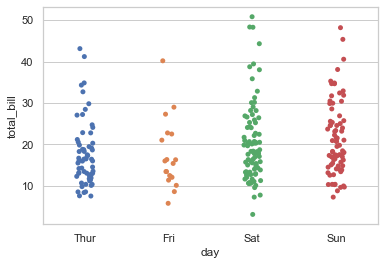

In [26]:
# sns.stripplot(x='day',y='total_bill',data=tips); # 重叠，不适用
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True); # 偏移

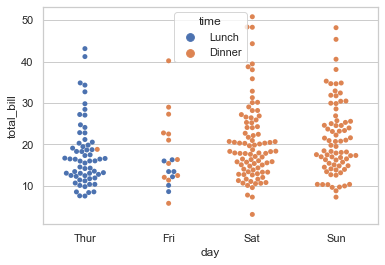

In [28]:
sns.swarmplot(x='day',y='total_bill',hue='time',data=tips); # hue:不同类别分组

盒图
- IQR即统计学概念四份位距，第一/四(1/4)分位与第三/四(3/4)分位之间的距离
- N = 1.5IQR 如果一个值>Q3+N OR <Q1-N ，则为离群点

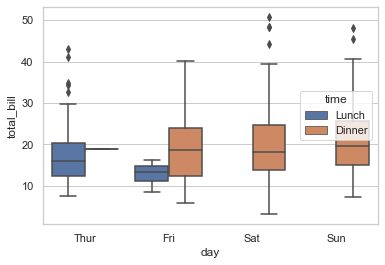

In [62]:
sns.boxplot(x='day',y='total_bill',hue='time',data=tips);
# sns.boxplot(x='day',y='total_bill',data=tips);

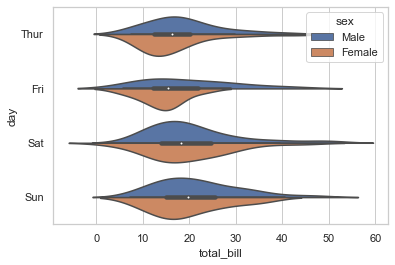

In [37]:
# sns.violinplot(y='day',x='total_bill',hue='time',data=tips);
sns.violinplot(y='day',x='total_bill',data=tips,hue='sex',split=True);

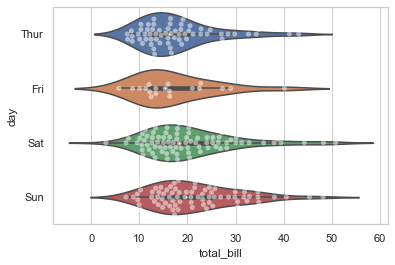

In [45]:
sns.violinplot(y='day',x='total_bill',data=tips);
sns.swarmplot(y='day',x='total_bill',data=tips,color='w',alpha=0.5); # alpha 透明度

显示值的集中趋势可以用条形图

In [59]:
sns.barplot(x='sex',y='survived',data=titanic,hue='class')

TypeError: Could not convert malemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemale to numeric

点图可以更好的描述变化差异

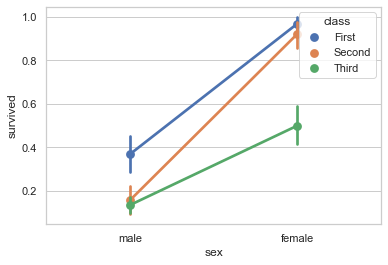

In [49]:
sns.pointplot(x='sex',y='survived',data=titanic,hue='class')

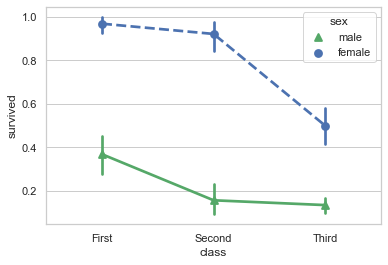

In [66]:
sns.pointplot(x='class',y='survived',data=titanic,hue='sex',
              palette={'male':'g','female':'b'},markers=['^','o'],linestyles=['-','--'])

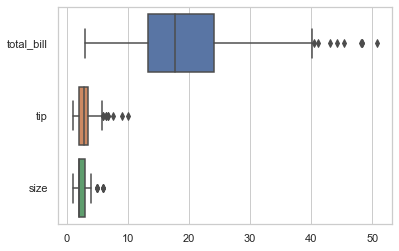

In [36]:
# 横向图形
sns.boxplot(data=tips,orient='h');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


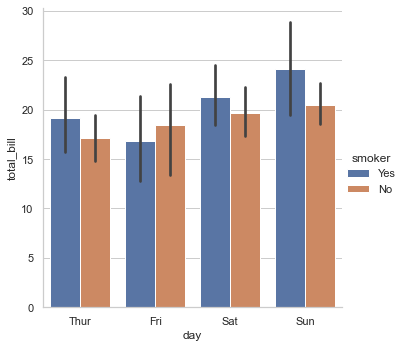

In [74]:
# 多层面板分类图
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips,kind='bar') # kind 指定面板即可画对应的图
# sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


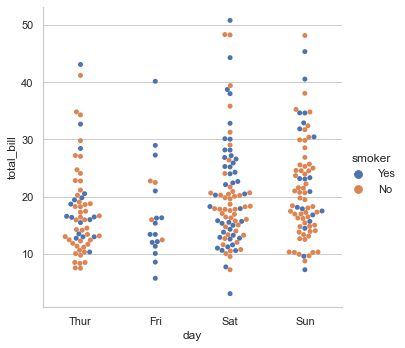

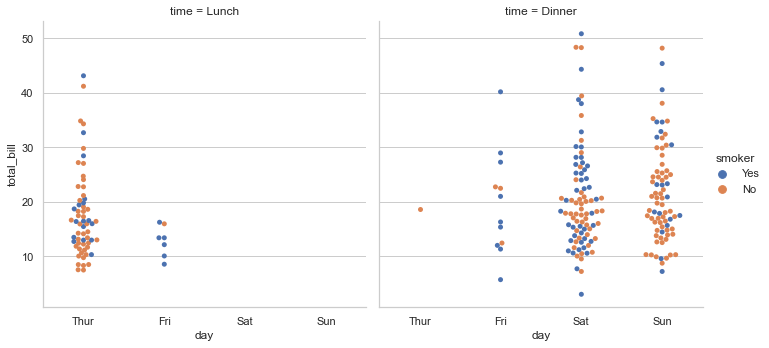

In [76]:
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips,kind='swarm')
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips,kind='swarm',col='time')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


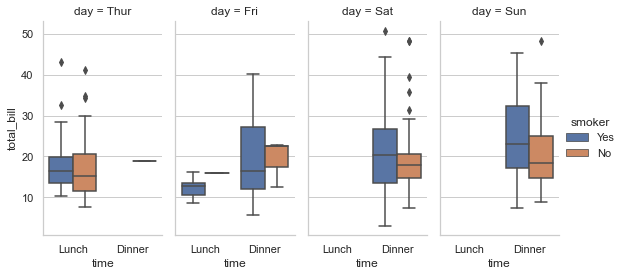

In [81]:
sns.factorplot(x='time',y='total_bill',hue='smoker',data=tips,kind='box',col='day',size=4,aspect=.5) #size aspect(方位 朝向) 长宽低

In [ ]:
# factorplot 更多参数参考文档

## facetgrid使用

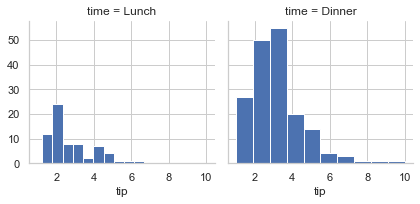

In [105]:
# 不能分开画，ValueError: Axes instance argument was not found in a figure
g = sns.FacetGrid(tips,col='time')
g.map(plt.hist,'tip')

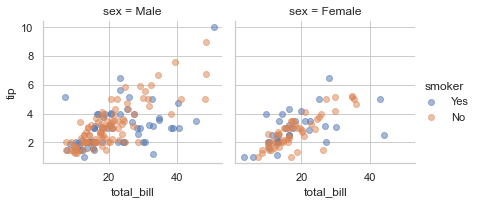

In [108]:
g = sns.FacetGrid(tips,col='sex',hue='smoker')
g.map(plt.scatter,'total_bill','tip',alpha=0.5)
g.add_legend()

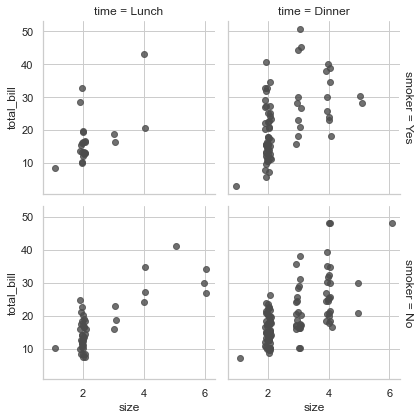

In [116]:
g = sns.FacetGrid(tips,row='smoker',col='time',margin_titles=True)
g.map(sns.regplot,'size','total_bill',color='0.3',fit_reg=False,x_jitter=0.1) # fit_reg回归线 color颜色深浅

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


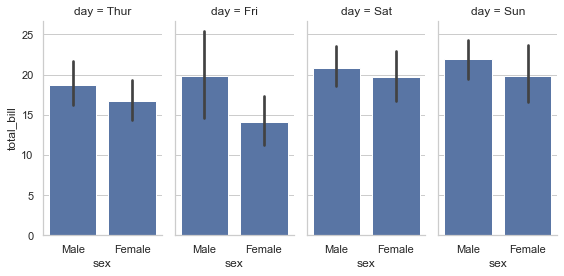

In [118]:
g = sns.FacetGrid(tips,col='day',size=4,aspect=0.5) # 长宽比
g.map(sns.barplot,'sex','total_bill')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


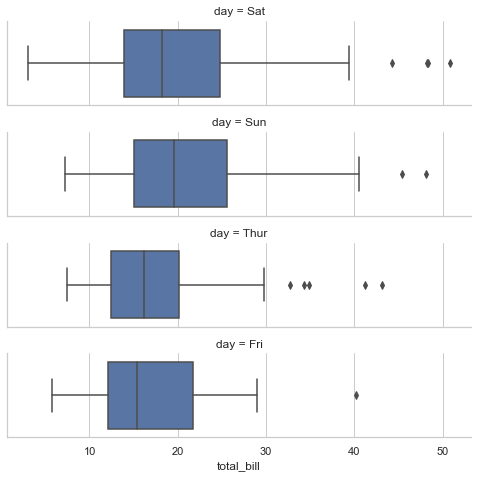

In [7]:
# 指定顺序画图
from pandas import Categorical
ordered_days = tips.day.value_counts().index
ordered_days = Categorical(ordered_days)
ordered_days

g = sns.FacetGrid(tips,row='day',row_order=ordered_days,size=1.7,aspect=4)
g.map(sns.boxplot,'total_bill')

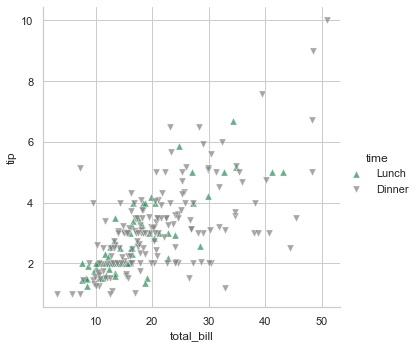

In [16]:
pal = dict(Lunch='seagreen',Dinner='gray')
g = sns.FacetGrid(tips,hue='time',palette=pal,size=5,hue_kws={'marker':['^','v']})
g.map(plt.scatter,'total_bill','tip',s=50,alpha=.7,linewidth=.5,edgecolor='white') # s 圆圈大小
g.add_legend()

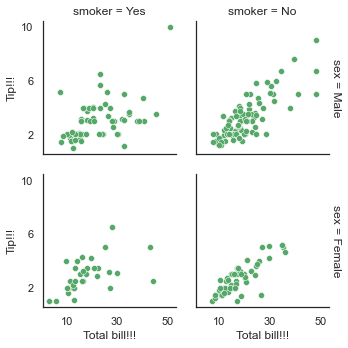

In [25]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips,row='sex',col='smoker',margin_titles=True,size=2.5)
g.map(plt.scatter,'total_bill','tip',color='g',edgecolor='white',lw=.5)
g.set_axis_labels('Total bill!!!','Tip!!!') # 坐标轴标签
g.set(xticks=[10,30,50],yticks=[2,6,10]) # 坐标轴取值范围
g.fig.subplots_adjust(wspace=.15,hspace=.15) # 图与图之间间距

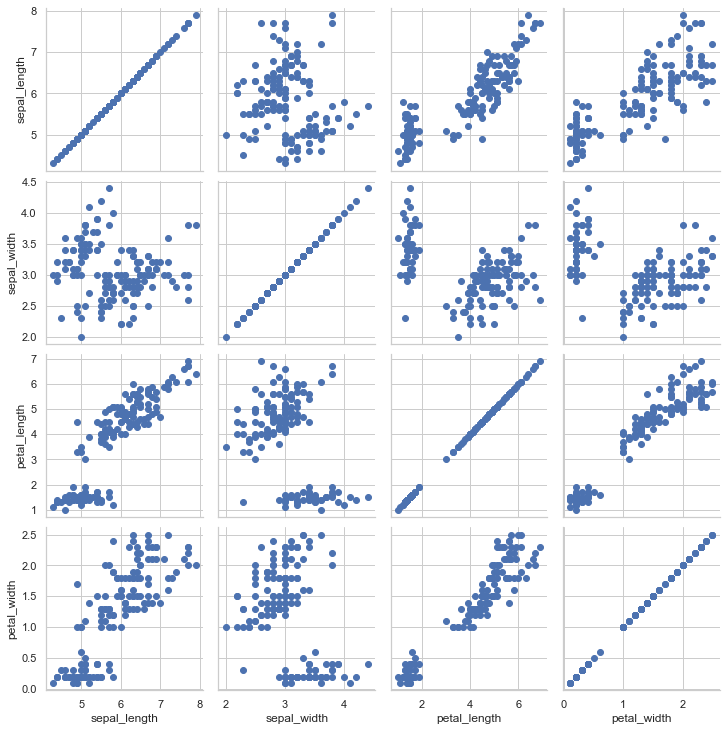

In [26]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

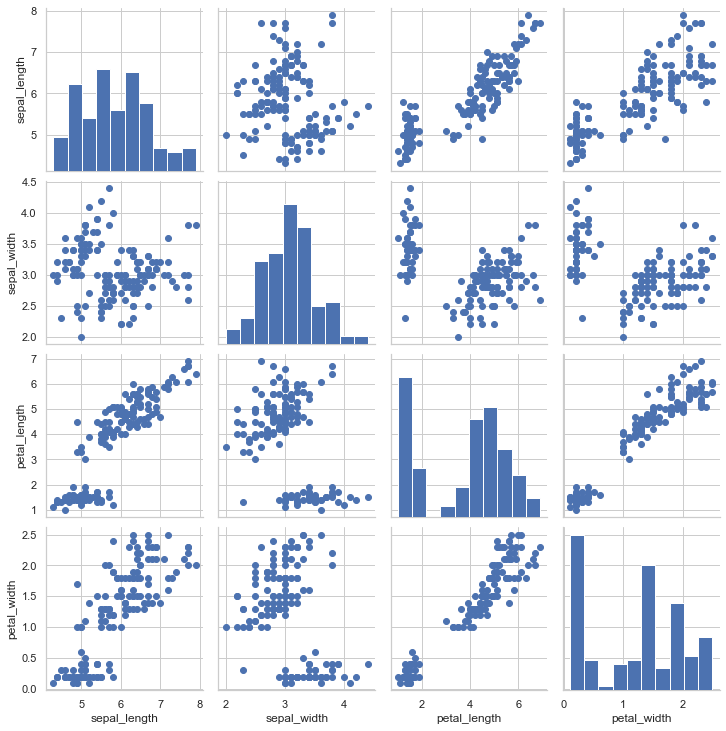

In [27]:
# diagonal 对角线
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

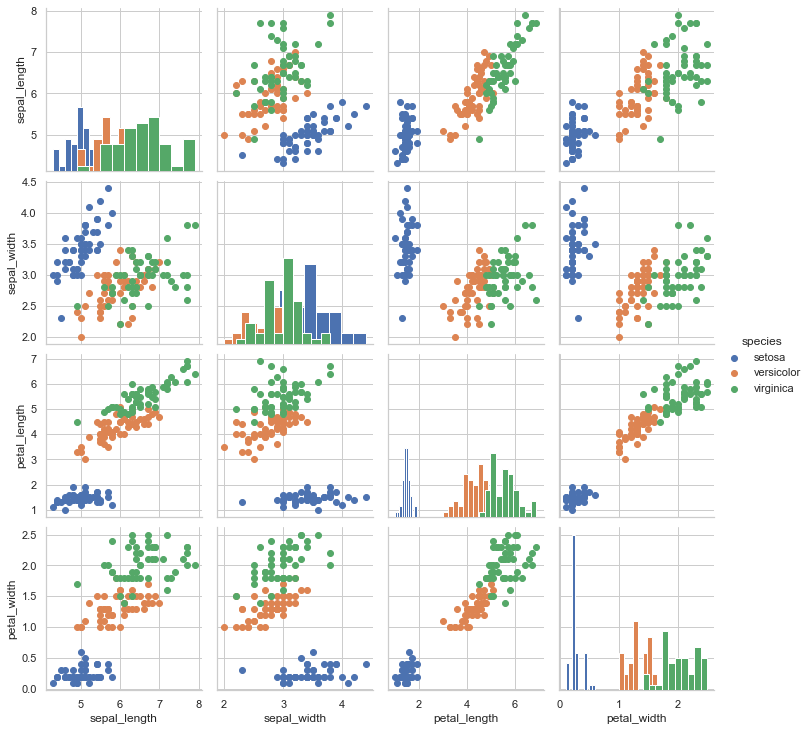

In [28]:
g = sns.PairGrid(iris,hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

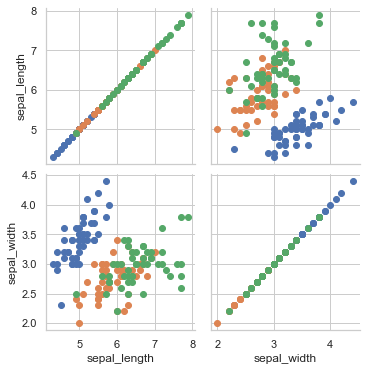

In [29]:
g = sns.PairGrid(iris,vars=['sepal_length','sepal_width'],hue='species') # 取两个数据维度
g.map(plt.scatter)

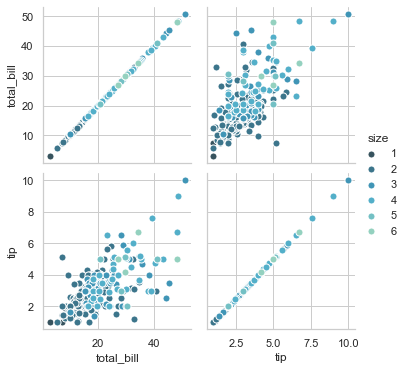

In [31]:
g = sns.PairGrid(tips,hue='size',palette='GnBu_d') # 取两个数据维度
g.map(plt.scatter,s=50,edgecolor='white')
g.add_legend()

## 热度图


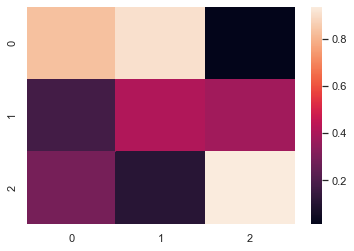

In [34]:
uniform_data = np.random.rand(3,3) # 矩阵
heatmap = sns.heatmap(uniform_data)

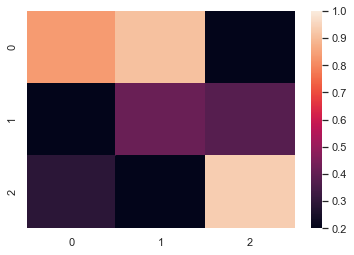

In [39]:
ax = sns.heatmap(uniform_data,vmin=0.2,vmax=1)

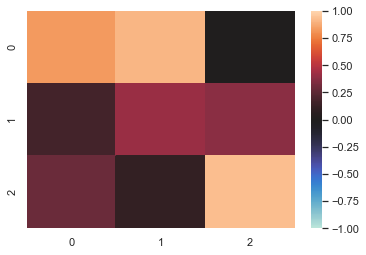

In [41]:
ax = sns.heatmap(uniform_data,vmin=-1,vmax=1,center=0) # center指定中心值

In [45]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


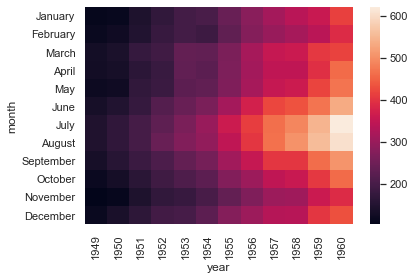

In [46]:
flightss = flights.pivot('month','year','passengers')
flightss.head()
ax = sns.heatmap(flightss)

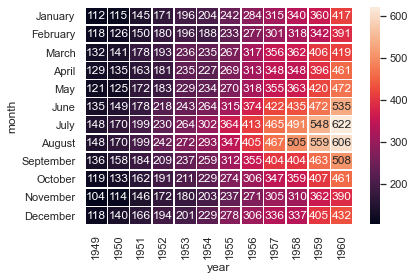

In [48]:
ax = sns.heatmap(flightss,annot=True,fmt='d',linewidths=.5) # annot注释数字 fmt字体格式

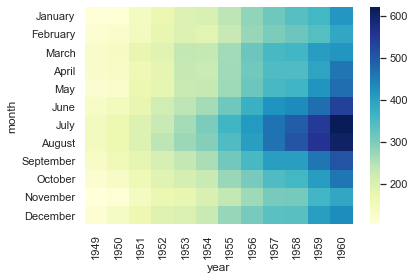

In [49]:
ax = sns.heatmap(flightss,cmap='YlGnBu')

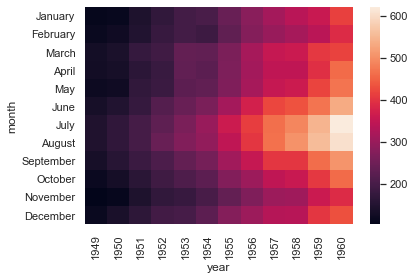

In [50]:
ax = sns.heatmap(flightss,cbar=True) # cbar 刻度条